# <center><font size="15" face="georgia">Práctica en equipo</font></center>
# <center><font face="georgia">Sistemas de recomendación</font></center>
<font face="georgia" >Integrantes:
* Esquivel Saldaña Jennifer
* Galicia García Hazzael Aligehri
* García Escobar Angélica Yazmín
* Lucio Ayala Alfredo Ramsés
* Peralta Velazquez Jair Israel

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
beers_dict = {'Bohemia Oscura': 'Boh_Osc',
              'Corona': 'Cor',
              'Dos Equis Ambar': 'Dos_Equ_Amb',
              'Dos Equis Laguer': 'Dos_Equ_Lag',
              'Indio': 'Ind',
              'Modelo Especial': 'Mod_Esp',
              'Negra Modelo': 'Neg_Mod',
              'Sol': 'Sol',
              'Tecate Light': 'Tec_Lig',
              'Victoria': 'Vic'}

lager_dict = {'Pilsner': 'Pil',
              #'Pale Lager': 'Pal_Lag',
              'Amber Lager': 'Amb_Lag',
              'Bock': 'Boc',
              'Dark Lager': 'Dar_Lag'}

ale_dict = {'Wheat Beer':'Whe_Bee',
            'Pale Ale': 'Pal_Ale',
            'Indian Pale Ale': 'Ind_Pal_Ale',
            'Strong Ale': 'Str_Ale',
            'Brown Ale': 'Bro_Ale',
            'Stout': 'Sto'}

answers_names_dict = {'Marca temporal': 'Date',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Barrilito]': 'Bar',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Bohemia Clara]': 'Boh_Cla',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Bohemia Oscura]': 'Boh_Osc',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Bud Light]': 'Bud_Lig',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Corona]': 'Cor',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Dos Equis Laguer]': 'Dos_Equ_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Dos Equis Ambar]': 'Dos_Equ_Amb',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Indio]': 'Ind',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [León]': 'Leo',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Modelo Especial]': 'Mod_Esp',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Montejo]': 'Mon',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Negra Modelo]': 'Neg_Mod',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Pacífico]': 'Pac',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Sol]': 'Sol',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Tecate Roja]': 'Tec_Roj',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Tecate Light]': 'Tec_Lig',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Victoria]': 'Vic',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Pale Lager]': 'Pal_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Pilsner]': 'Pil',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Amber Lager]': 'Amb_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Bock]': 'Boc',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Dark Lager]': 'Dar_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Wheat Beer]': 'Whe_Bee',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Pale Ale]': 'Pal_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Indian Pale Ale]': 'Ind_Pal_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Strong Ale]': 'Str_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Brown Ale]': 'Bro_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Porter]': 'Por',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Stout]': 'Sto'}

In [3]:
#Recuerda tener el archivo Users_Responses.csv en el mismo directorio que esta notebook para poder ejecutar el pd.read_csv()
answers_df = pd.read_csv("Users_Responses.csv")

answers_df.rename(columns=answers_names_dict,
                  inplace=True)

answers_df.replace('SR', np.nan, inplace=True)
#Nota que originalmente tenemos las respuestas de 52 personas
answers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         52 non-null     object 
 1   Bar          33 non-null     object 
 2   Boh_Cla      36 non-null     object 
 3   Boh_Osc      38 non-null     object 
 4   Cor          43 non-null     object 
 5   Dos_Equ_Lag  40 non-null     object 
 6   Dos_Equ_Amb  36 non-null     object 
 7   Ind          41 non-null     object 
 8   Leo          36 non-null     object 
 9   Mod_Esp      37 non-null     object 
 10  Mon          32 non-null     object 
 11  Neg_Mod      36 non-null     object 
 12  Sol          40 non-null     object 
 13  Tec_Roj      35 non-null     object 
 14  Tec_Lig      40 non-null     object 
 15  Vic          38 non-null     object 
 16  Pal_Lag      27 non-null     object 
 17  Pil          27 non-null     object 
 18  Amb_Lag      28 non-null     object 
 19  Boc       

In [4]:
styles_null = []
beers_null = []

for i in range(len(answers_df.index)):
    styles_null.append(answers_df.loc[i, list(lager_dict.values()) + list(ale_dict.values())].isnull().sum())
    beers_null.append(answers_df.loc[i, list(beers_dict.values())].isnull().sum())

answers_df['style_nulls'] = styles_null
answers_df['beer_nulls'] = beers_null

answers_df = answers_df[(answers_df.style_nulls <= 4) & (answers_df.beer_nulls <= 4)]
answers_df.reset_index(drop=True, inplace=True)

comercials = list(beers_dict.values())
answers_df = answers_df.fillna(answers_df.median())

<ipython-input-4-828a9ad9f7be>:15: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  answers_df = answers_df.fillna(answers_df.median())


In [5]:
#Después del filtrado previo, quedan solo las respuestas de 25 personas
answers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         25 non-null     object 
 1   Bar          25 non-null     object 
 2   Boh_Cla      25 non-null     object 
 3   Boh_Osc      25 non-null     object 
 4   Cor          25 non-null     object 
 5   Dos_Equ_Lag  25 non-null     object 
 6   Dos_Equ_Amb  25 non-null     object 
 7   Ind          25 non-null     object 
 8   Leo          25 non-null     object 
 9   Mod_Esp      25 non-null     object 
 10  Mon          25 non-null     object 
 11  Neg_Mod      25 non-null     object 
 12  Sol          25 non-null     object 
 13  Tec_Roj      25 non-null     object 
 14  Tec_Lig      25 non-null     object 
 15  Vic          25 non-null     object 
 16  Pal_Lag      25 non-null     object 
 17  Pil          25 non-null     object 
 18  Amb_Lag      25 non-null     object 
 19  Boc       

Las siguientes celdas de código no son necesarias para tu asignación, sin embargo la función manhattan_distances sí te puede servir para el tema del cálculo de distancias entre cada pareja de usuarios (de sus respuestas).

In [6]:
def all_the_drunks(form,data):
    d_na = manhattan_distances([form], data[comercials])
    d_na = d_na.max() - d_na
    A = data[list(lager_dict.values()) + list(ale_dict.values())].to_numpy()
    A = A.astype(float)
    S_rec = np.dot(d_na, A)
    S_rec = S_rec / np.sum(d_na)
    return S_rec

In [7]:
def drunk_team(form,data):
    d_na = manhattan_distances([form], data[comercials])
    top = list(d_na.argsort()[0][:5])
    drink_team = data.loc[top, list(lager_dict.values()) + list(ale_dict.values())].to_numpy().astype(float)
    rec = np.average(drink_team, axis=0)
    return rec

In [8]:
d = manhattan_distances(answers_df[comercials]) # matriz de distancias
d_min = min(d[d > 0]) # distancia mínima entre dos personas distintas
print(f"La distancia mínima es {d_min}")

La distancia mínima es 3.5


Para encontrar la distancia mínima entre dos personas distintas, usamos la función $min$  de Python sobre la matriz de distancias $d$. Sin embargo, como la diagonal de la matriz tiene ceros (que corresponden a la distancia de una persona consigo misma), usamos el filtro $d > 0$ para excluir esos valores. Hicimos lo mismo para la distancia máxima.


In [9]:
d_max = max(d[d > 0]) # distancia máxima entre dos personas distintas
print(f"La distancia máxima es {d_max}")

La distancia máxima es 29.0


In [10]:
d_20 = np.percentile(d[d > 0], 80) # distancia que corresponde al percentil 80 de las distancias
d_20

16.0

NOTA. Un umbral máximo para el grafo es el valor más alto que puede tener la distancia entre dos nodos para que se dibuje una arista entre ellos. Por ejemplo, si el umbral máximo es 10, solo se dibujarán las aristas entre los nodos que tengan una distancia menor o igual a 10. Esto puede servir para simplificar el grafo y mostrar solo las conexiones más cercanas o relevantes.
En este caso, el percentil es 80, lo que significa que el 80% de las distancias son menores o iguales al umbral máximo, y el 20% son mayores. El conjunto de datos son las distancias entre las preferencias de cerveza de cada par de personas, que se obtienen con la función **manhattan_distances**.

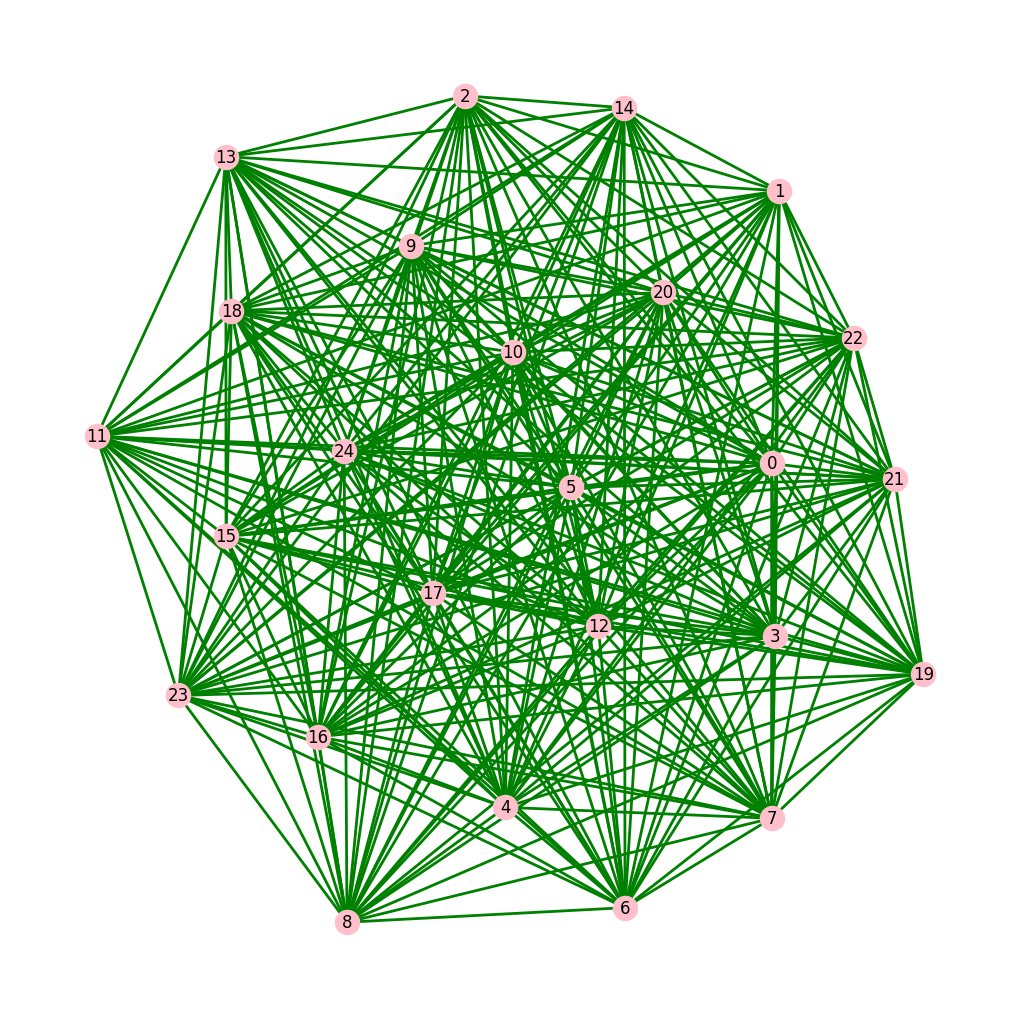

In [11]:
G = nx.from_numpy_array(d) # crear un grafo a partir de la matriz de distancias
plt.figure(figsize=(10,10)) # ajustar el tamaño de la figura
nx.draw(G, with_labels=True, node_color='pink', edge_color='green', width=2) # dibujar el grafo
plt.show() # mostrar el grafo

Para simular un grafo aleatorio con 25 vértices y el 20% de las aristas dibujadas al azar, usamos la función **gnp_random_graph** de **networkx**, que te devuelve un grafo de Erdos-Renyi que es un tipo de grafo aleatorio que se genera conectando nodos con una probabilidad fija, independientemente de los otros nodos. Es decir, cada posible arista entre dos nodos tiene la misma probabilidad de existir o no. Este modelo se usa para estudiar las propiedades de los grafos aleatorios y para simular redes complejas. Esta función toma como argumentos el número de nodos y la probabilidad de que exista una arista entre cada par de nodos. Para calcular la probabilidad que corresponde al 20% de las aristas, usamos la fórmula  $p = 2 * m / (n * (n - 1))$, donde $m$ es el número de aristas y $n$ es el número de nodos.

In [12]:
import networkx as nx
n = 25 # número de nodos
m = int(0.2 * n * (n - 1) / 2) # número de aristas
p = 2 * m / (n * (n - 1)) # probabilidad de arista
R = nx.gnp_random_graph(n, p) # crear un grafo aleatorio


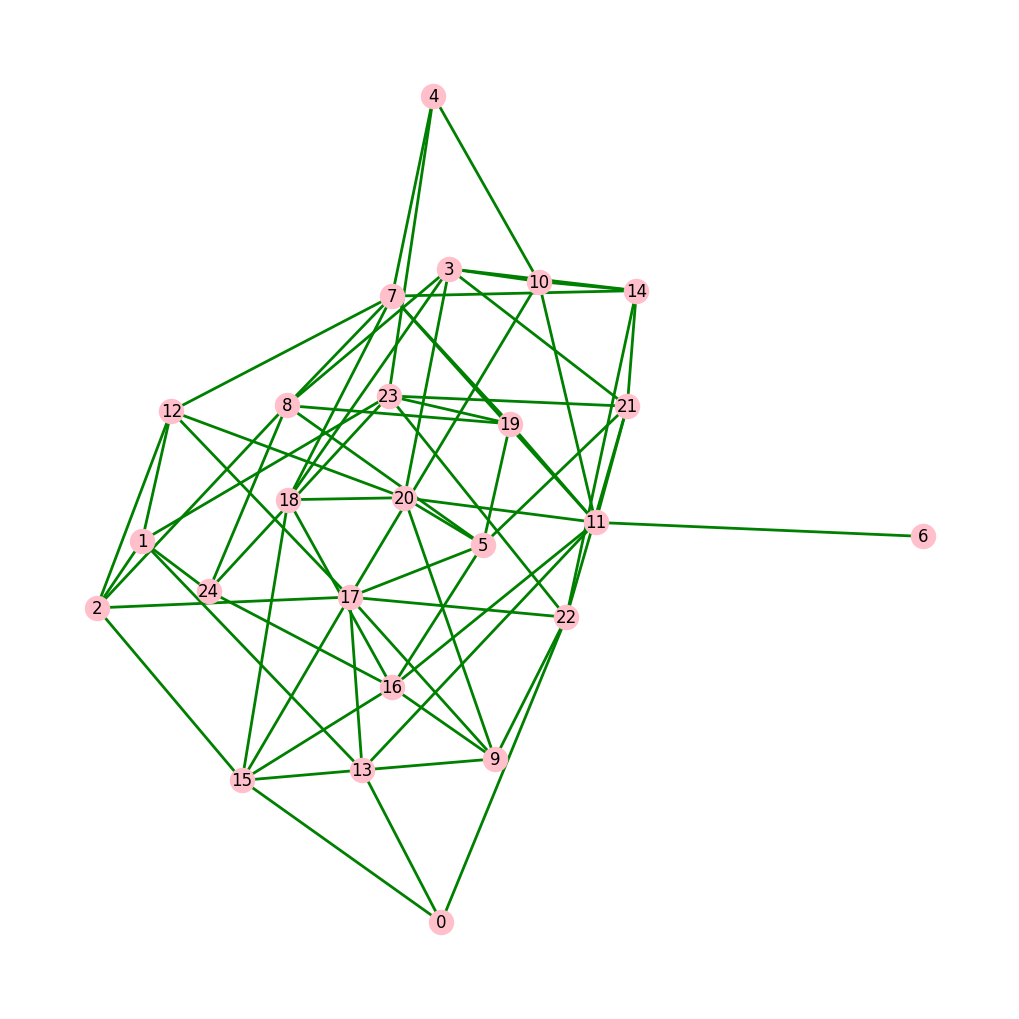

In [13]:
plt.figure(figsize=(10,10)) # ajustar el tamaño de la figura
nx.draw(R, with_labels=True, node_color='pink', edge_color='green', width=2) # dibujar el grafo
plt.show() # mostrar el grafo

Para comparar el grafo real con el simulado, usamos algunas medidas de teoría de grafos, como el número de nodos, el número de aristas, el grado medio, la densidad, el diámetro, el coeficiente de agrupamiento, etc. Calculamos estas medidas usando las funciones de networkx, como number_of_nodes, number_of_edges, average_degree, density, diameter, average_clustering, etc.

El número de nodos es el número de vértices o puntos del grafo.

El número de aristas es el número de líneas o segmentos que conectan los nodos del grafo.

El grado medio es el promedio de los grados de todos los nodos del grafo. El grado de un nodo es el número de aristas que inciden en él. Por ejemplo, el grado de un nodo A es 5, porque tiene 5 aristas que lo tocan.

La densidad es una medida que indica la proporción de aristas que tiene el grafo en relación al número máximo de aristas posibles. Un grafo denso tiene muchas aristas, cerca del máximo, y un grafo disperso tiene pocas aristas, cerca de cero. La densidad se calcula como el número de aristas dividido entre el número máximo de aristas.

El diámetro es la distancia máxima entre dos nodos del grafo. La distancia entre dos nodos es el número mínimo de aristas que hay que recorrer para ir de uno a otro.

El coeficiente de agrupamiento es una medida que indica el grado de conectividad local de los nodos del grafo. Se calcula como el número de triángulos (subgrafos de 3 nodos y 3 aristas) dividido entre el número de tríadas (subgrafos de 3 nodos y al menos 2 aristas). Un triángulo es una tríada, pero una tríada no tiene por qué ser un triángulo.

In [14]:
# Calcular algunas medidas del grafo real G
n_G = nx.number_of_nodes(G) # número de nodos
m_G = nx.number_of_edges(G) # número de aristas
d_G = nx.density(G) # densidad
D_G = nx.diameter(G) # diámetro
C_G = nx.average_clustering(G) # coeficiente de agrupamiento

# Calcular algunas medidas del grafo simulado R
n_R = nx.number_of_nodes(R) # número de nodos
m_R = nx.number_of_edges(R) # número de aristas
d_R = nx.density(R) # densidad
D_R = nx.diameter(R) # diámetro
C_R = nx.average_clustering(R) # coeficiente de agrupamiento


In [15]:
# Descripción de las similitudes y/o diferencias
print(f"El grafo real y el simulado tienen el mismo número de nodos: {n_G}")
print(f"El grafo real tiene {m_G} aristas, mientras que el simulado tiene {m_R}")
print(f"La densidad del grafo real es {d_G}, mientras que la del simulado es {d_R}")
print(f"El diámetro del grafo real es {D_G}, mientras que el del simulado es {D_R}")
print(f"El coeficiente de agrupamiento del grafo real es {C_G}, mientras que el del simulado es {C_R}")


El grafo real y el simulado tienen el mismo número de nodos: 25
El grafo real tiene 300 aristas, mientras que el simulado tiene 67
La densidad del grafo real es 1.0, mientras que la del simulado es 0.22333333333333333
El diámetro del grafo real es 1, mientras que el del simulado es 4
El coeficiente de agrupamiento del grafo real es 1.0, mientras que el del simulado es 0.16571428571428573


In [16]:
np.random.seed(46)
datos = np.random.randint(5,size=(25,32))
encuesta_nueva = pd.DataFrame( datos, columns=answers_df.columns.values.tolist() )
#encuesta_nueva

In [17]:
#La jeni
my_form_dict = {'Boh_Osc':5,
                'Cor':3,
                'Dos_Equ_Amb':3,
                'Dos_Equ_Lag':3,
                'Ind':5,
                'Mod_Esp':5,
                'Neg_Mod':5,
                'Sol':1,
                'Tec_Lig':1,
                'Vic':3}
my_form_values = list(my_form_dict.values())
S_rec = all_the_drunks(my_form_values,answers_df )
rec = drunk_team(my_form_values,answers_df )
Rec_df = pd.DataFrame()
Rec_df['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df['all the drunk'] = S_rec[0]
Rec_df['drunk team'] = rec
#------------------------------------------------------------Aleatorio----------------------------------------
S_rec = all_the_drunks(my_form_values,encuesta_nueva )
rec = drunk_team(my_form_values,encuesta_nueva )
Rec_df1 = pd.DataFrame()
Rec_df1['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df1['all the drunk'] = S_rec[0]
Rec_df1['drunk team'] = rec
display(Rec_df)
display(Rec_df1)

,Estilos,all the drunk,drunk team
0,Pilsner,3.207283,3.2
1,Amber Lager,3.302521,3.8
2,Bock,3.358543,4.0
3,Dark Lager,3.927171,4.4
4,Wheat Beer,3.011204,3.0
5,Pale Ale,3.151261,2.8
6,Indian Pale Ale,3.361345,3.0
7,Strong Ale,3.198880,3.2
8,Brown Ale,3.347339,2.6
9,Stout,3.899160,3.8


,Estilos,all the drunk,drunk team
0,Pilsner,2.290123,2.2
1,Amber Lager,1.851852,2.4
2,Bock,1.722222,2.0
3,Dark Lager,2.308642,1.6
4,Wheat Beer,2.123457,2.4
5,Pale Ale,1.858025,1.8
6,Indian Pale Ale,2.154321,2.0
7,Strong Ale,1.938272,2.4
8,Brown Ale,2.351852,2.4
9,Stout,2.012346,2.6


In [18]:
#La Angie
my_form_dict = {'Boh_Osc':1,
                'Cor':4,
                'Dos_Equ_Amb':4,
                'Dos_Equ_Lag':2,
                'Ind':5,
                'Mod_Esp':5,
                'Neg_Mod':2,
                'Sol':3,
                'Tec_Lig':1,
                'Vic':5}
my_form_values = list(my_form_dict.values())
S_rec = all_the_drunks(my_form_values,answers_df )
rec = drunk_team(my_form_values,answers_df )
Rec_df = pd.DataFrame()
Rec_df['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df['all the drunk'] = S_rec[0]
Rec_df['drunk team'] = rec
#------------------------------------------------------------Aleatorio----------------------------------------
S_rec = all_the_drunks(my_form_values,encuesta_nueva )
rec = drunk_team(my_form_values,encuesta_nueva )
Rec_df1 = pd.DataFrame()
Rec_df1['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df1['all the drunk'] = S_rec[0]
Rec_df1['drunk team'] = rec
display(Rec_df)
display(Rec_df1)

,Estilos,all the drunk,drunk team
0,Pilsner,3.153034,2.8
1,Amber Lager,3.232190,2.8
2,Bock,3.116095,2.8
3,Dark Lager,3.667546,3.4
4,Wheat Beer,2.841689,2.2
5,Pale Ale,3.174142,2.8
6,Indian Pale Ale,3.398417,3.2
7,Strong Ale,3.023747,2.6
8,Brown Ale,3.221636,2.6
9,Stout,3.715040,2.8


,Estilos,all the drunk,drunk team
0,Pilsner,2.396313,2.6
1,Amber Lager,1.843318,1.2
2,Bock,1.870968,2.4
3,Dark Lager,2.087558,1.6
4,Wheat Beer,2.138249,2.6
5,Pale Ale,1.981567,2.6
6,Indian Pale Ale,2.258065,2.4
7,Strong Ale,1.682028,1.8
8,Brown Ale,1.986175,1.8
9,Stout,2.082949,1.6


In [19]:
#El Jair
my_form_dict = {'Boh_Osc':1,
                'Cor':4,
                'Dos_Equ_Amb':3,
                'Dos_Equ_Lag':5,
                'Ind':1,
                'Mod_Esp':1,
                'Neg_Mod':1,
                'Sol':5,
                'Tec_Lig':1,
                'Vic':3}
my_form_values = list(my_form_dict.values())
S_rec = all_the_drunks(my_form_values,answers_df )
rec = drunk_team(my_form_values,answers_df )
Rec_df = pd.DataFrame()
Rec_df['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df['all the drunk'] = S_rec[0]
Rec_df['drunk team'] = rec
#------------------------------------------------------------Aleatorio----------------------------------------
S_rec = all_the_drunks(my_form_values,encuesta_nueva )
rec = drunk_team(my_form_values,encuesta_nueva )
Rec_df1 = pd.DataFrame()
Rec_df1['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df1['all the drunk'] = S_rec[0]
Rec_df1['drunk team'] = rec
display(Rec_df)
display(Rec_df1)

,Estilos,all the drunk,drunk team
0,Pilsner,3.214797,3.6
1,Amber Lager,3.181384,3.0
2,Bock,3.009547,2.6
3,Dark Lager,3.470167,3.2
4,Wheat Beer,2.675418,2.0
5,Pale Ale,3.272076,3.6
6,Indian Pale Ale,3.217184,3.4
7,Strong Ale,2.954654,2.6
8,Brown Ale,3.143198,3.4
9,Stout,3.704057,3.6


,Estilos,all the drunk,drunk team
0,Pilsner,2.259459,2.0
1,Amber Lager,1.783784,2.0
2,Bock,1.816216,3.0
3,Dark Lager,2.232432,2.0
4,Wheat Beer,2.151351,2.2
5,Pale Ale,1.913514,1.8
6,Indian Pale Ale,2.227027,3.0
7,Strong Ale,1.432432,0.8
8,Brown Ale,2.167568,2.0
9,Stout,2.345946,3.0


In [20]:
#El Alfredo
my_form_dict = {'Boh_Osc':1,
                'Cor':1,
                'Dos_Equ_Amb':1,
                'Dos_Equ_Lag':1,
                'Ind':1,
                'Mod_Esp':1,
                'Neg_Mod':1,
                'Sol':1,
                'Tec_Lig':1,
                'Vic':1}
my_form_values = list(my_form_dict.values())
S_rec = all_the_drunks(my_form_values,answers_df )
rec = drunk_team(my_form_values,answers_df )
Rec_df = pd.DataFrame()
Rec_df['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df['all the drunk'] = S_rec[0]
Rec_df['drunk team'] = rec
#------------------------------------------------------------Aleatorio----------------------------------------
S_rec = all_the_drunks(my_form_values,encuesta_nueva )
rec = drunk_team(my_form_values,encuesta_nueva )
Rec_df1 = pd.DataFrame()
Rec_df1['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df1['all the drunk'] = S_rec[0]
Rec_df1['drunk team'] = rec
display(Rec_df)
display(Rec_df1)

,Estilos,all the drunk,drunk team
0,Pilsner,3.194993,3.0
1,Amber Lager,3.121212,2.8
2,Bock,3.100132,2.6
3,Dark Lager,3.499341,2.4
4,Wheat Beer,2.657444,2.0
5,Pale Ale,3.371542,3.8
6,Indian Pale Ale,3.422925,3.8
7,Strong Ale,3.122530,3.0
8,Brown Ale,3.324111,3.2
9,Stout,3.923584,4.0


,Estilos,all the drunk,drunk team
0,Pilsner,2.490741,3.0
1,Amber Lager,1.962963,2.0
2,Bock,1.675926,1.6
3,Dark Lager,2.333333,2.6
4,Wheat Beer,2.185185,1.8
5,Pale Ale,2.101852,2.2
6,Indian Pale Ale,2.231481,2.2
7,Strong Ale,1.481481,1.6
8,Brown Ale,1.990741,1.8
9,Stout,2.481481,3.0


In [25]:
#yo mero palomero
my_form_dict = {'Boh_Osc':0,
                'Cor':1,
                'Dos_Equ_Amb':1,
                'Dos_Equ_Lag':1,
                'Ind':0,
                'Mod_Esp':0,
                'Neg_Mod':0,
                'Sol':0,
                'Tec_Lig':1,
                'Vic':0}
my_form_values = list(my_form_dict.values())
S_rec = all_the_drunks(my_form_values,answers_df )
rec = drunk_team(my_form_values,answers_df )
Rec_df = pd.DataFrame()
Rec_df['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df['all the drunk'] = S_rec[0]
Rec_df['drunk team'] = rec
#------------------------------------------------------------Aleatorio----------------------------------------
S_rec = all_the_drunks(my_form_values,encuesta_nueva )
rec = drunk_team(my_form_values,encuesta_nueva )
Rec_df1 = pd.DataFrame()
Rec_df1['Estilos'] = list(lager_dict.keys()) + list(ale_dict.keys())
Rec_df1['all the drunk'] = S_rec[0]
Rec_df1['drunk team'] = rec
display(Rec_df)
display(Rec_df1)

,Estilos,all the drunk,drunk team
0,Pilsner,3.194993,3.0
1,Amber Lager,3.121212,2.8
2,Bock,3.100132,2.6
3,Dark Lager,3.499341,2.4
4,Wheat Beer,2.657444,2.0
5,Pale Ale,3.371542,3.8
6,Indian Pale Ale,3.422925,3.8
7,Strong Ale,3.122530,3.0
8,Brown Ale,3.324111,3.2
9,Stout,3.923584,4.0


,Estilos,all the drunk,drunk team
0,Pilsner,2.448864,3.0
1,Amber Lager,1.931818,2.0
2,Bock,1.607955,1.6
3,Dark Lager,2.409091,2.6
4,Wheat Beer,2.125000,1.8
5,Pale Ale,2.051136,2.2
6,Indian Pale Ale,2.164773,2.2
7,Strong Ale,1.647727,1.6
8,Brown Ale,2.017045,1.8
9,Stout,2.215909,3.0
